**Проект "Рынок заведений общественного питания Москвы"**

# Введение.

Вместе с партнерами мы решили попробовать свои силы в ресторанном бизнесе. Так как все мы имеем техническое образование и являемся сторонниками технического прогресса, то было прнято решение приоритетным направлением выбрать современные компьютерные технологии и робототехнику. 

В предполагаемом нами для открытия небольшом ресторане мы хотим использовать нейронную сеть для обработки и предугадывания заказов клиентов с методами машинного обучения и роботов-официантов. По нашим расчетам это позволит увеличить скорость и качество обслуживания, сократит издержки и будет являться притягивающим необычным фактором для посетителей. 

Однако для этого потребуется привлечение дополнительных инвестиций. Мы с партнерами готовы сами разработать и запустить алгоритм для нейронной сети. А вот для реализации идеи с роботами-официантами мы предполагаем привлечь стороннего партнера. Для этого нам и требуется инвестор.

Также для удачного запуска нашего проекта нам необходимо выбрать подходящее место размещения нашего объекта.

Этот проект позволит проанализировать рынок заведений общественного питания в Москве и определиться в каком районе лучше располагать наш ресторан. 

Этот анализ будет также представлен для потенциальных инвесторов в презентации.

Ссылка: <https://disk.yandex.ru/i/la4jlB7-DIrdPg>

# Содержание

1. Загрузка и предобработка данных.

2. Исследование соотношения видов объектов общественного питания по количеству.

3. Исследование соотношения сетевых и несетевых заведений по количеству.

4. Исследование характера сетевых заведений по группам.

5. Исследование видов объектов общественного питания по среднему количеству посадочных мест.

6. Исследование расположения объектов общественного питания по улицам.

7. Топ-10 улиц по количеству объектов общественного питания.

8. Улицы с одним объектом общественного питания.

9. Вывод. 

# 1. Загрузка и предобработка данных

Первым делом импортируем необходимые нам библиотеки.

In [2]:
import pandas as pd
import numpy as np
from numpy import median
#from scipy import stats as st
#import math as mth
#import datetime as dt
#from datetime import datetime, timedelta
#import plotly.express as px 
f#rom plotly import graph_objects as go
import re

import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

pd.options.display.max_colwidth = 600

Теперь откроем файл с информацией об объектах общественного питания полученного из открытых данных.

In [3]:
try:
    rest_data = pd.read_csv('rest_data.csv')
except:
    rest_data = pd.read_csv('/datasets/rest_data.csv')
    
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Посмотрим на информацию о латафрейме.

In [4]:
rest_data.shape

(15366, 6)

In [5]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Данные представленны в таблице из 6 столбцов и 15366 строк.

Проверим данные на пропуски. (предварительно заключаем, что их быть не должно)

In [6]:
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Так и есть, данные не имеют пропусков.

Теперь проверим на очевидные дубликаты.

In [7]:
rest_data.duplicated().sum()

0

Дуликаты отсутствуют.

Проверим данные на неочевидные дубликаты.

Посчитаем количество уникальных значений `'id'`.


In [8]:
rest_data['id'].nunique()

15366

Оно совпадает с количеством строк в датафрейме.

Теперь посмотрим на уникальные значения в графе `chain`.

In [9]:
rest_data['chain'].unique()

array(['нет', 'да'], dtype=object)

Только два значения - да и нет. Очень зорошо.

Посмотрим на уникальные значения в столбце `object_type`.

In [10]:
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Дублирующихся значений нет. Идем далее.

Посмотрим на количество уникальных уникальных названий заведений в столбце `object_name`.

In [11]:
rest_data['object_name'].nunique()

10393

10183 - очень большое количество уникальных названий заведений.

Посмтрим на топ-20 самых популярных названий.

In [12]:
rest_data['object_name'].value_counts().head(20)

Столовая                    267
Кафе                        236
Шаурма                      234
KFC                         155
Шоколадница                 142
Бургер Кинг                 122
Макдоналдс                  122
Домино'с Пицца               86
Теремок                      84
Крошка Картошка              82
Пекарня                      76
Милти                        65
Суши Wok                     61
Буфет                        59
СТОЛОВАЯ                     52
Папа Джонс                   50
Школьно-базовая столовая     44
Кофе с собой                 44
Чайхона №1                   42
КАФЕ                         41
Name: object_name, dtype: int64

Здесь мы видим как знакомые названия известных сетевых заведений, так и обычные "столовая" и "кафе".

Отсортируем данные по сетевому признакуи выведем только топ-25 сетевых заведений.

In [13]:
rest_data_y = rest_data.query('chain == "да"')
rest_data_y['object_name'].value_counts().head(25)

KFC                155
Шоколадница        141
Бургер Кинг        122
Макдоналдс         122
Домино'с Пицца      86
Теремок             84
Крошка Картошка     82
Милти               65
Суши Wok            61
Папа Джонс          50
Кофе с собой        44
Чайхона №1          42
Хинкальная          35
Якитория            33
Кофе Хаус           31
Додо Пицца          31
Starbucks           30
Subway              29
МАКДОНАЛДС          29
Тануки              26
Хлеб насущный       24
Иль Патио           23
Мята Lounge         23
Прайм стар          22
Cofix               22
Name: object_name, dtype: int64

Мы видим, что "столовая" и "кафе" отсеялись, значит это были несетевые объекты без уникального названия. В этом проекте можно обработать только 25 самых распространенных заведений общественного питания.

Для того чтобы найти неочевидные дубликаты для составим список значений для замены, искать которые с помощью метода `contains`. 

In [14]:
#Пример поиска дублирующихся значений.
myata =  rest_data[rest_data['object_name'].str.contains('мята lounge', flags=re.IGNORECASE)]
myata = myata['object_name'].unique()
myata

array(['Мята Lounge', 'Кафе «Мята Lounge» Кальянный клуб',
       'Кальянная Мята Lounge', 'Кальян-бар Мята Lounge',
       'Кальян-бар «Мята Lounge»', 'Кальян- бар «Мята Lounge»',
       'Мята Lounge Шаболовка', 'Мята Lounge Автозаводская',
       'Мята lounge', 'Лаундж-бар «Мята Lounge»', 'Бар Мята Lounge',
       'Мята Lounge Октябрьская', 'Кальянная «Мята Lounge»'], dtype=object)

Создадим функцию, которая будет искать и заменять дублирующиеся значения в датафрейме и передадим ей список.

In [15]:
synonyms = {'Мята Lounge':['Мята Lounge', 'Кафе «Мята Lounge» Кальянный клуб',
       'Кальянная Мята Lounge', 'Кальян-бар Мята Lounge',
       'Кальян-бар «Мята Lounge»', 'Кальян- бар «Мята Lounge»',
       'Мята Lounge Шаболовка', 'Мята Lounge Автозаводская',
       'Мята lounge', 'Лаундж-бар «Мята Lounge»', 'Бар Мята Lounge',
       'Мята Lounge Октябрьская', 'Кальянная «Мята Lounge»'],
           'McDonalds':['МАКДОНАЛДС', 'Ресторан «Макдоналдс»', 'Макдоналдс',
       'Предприятие быстрого обслуживания «Макдоналдс»',
       'МОСКВА - МАКДОНАЛДС', 'КАФЕ МАКДОНАЛДС', 'КАФЕ «МАКДОНАЛДС»',
       'Кафе «МАКДОНАЛДС»', 'РЕСТОРАН«МАКДОНАЛДС»', 'Кафе «Макдоналдс»'],
           'Якитория':['ресторан «Якитория»', 'Кафе «Якитория»', 'Якитория', 'ЯКИТОРИЯ',
       'Ресторан «Якитория»', 'Якитория и Ян Примус', 'Кафе Якитория',
       'КАФЕ «ЯКИТОРИЯ»', 'Ресторан «ЯКИТОРИЯ»', 'ЯКИТОРИЯ И СПОРТ БАР'],
           'Суши Wok':['Суши Wok', 'СУШИ ВОК', 'Суши WoK', 'Суши Вок', 'Суши WOK',
       'СУШИ WOK', 'Кафе «Суши Вок»', 'Сеть магазинов «Суши Wok»',
       'Кафе Суши Wok', 'Кафе «Суши Wok»', 'Бар «Суши Wok»', 'Суши вок'],
           'Тануки':['Тануки', 'ТАНУКИ', 'Кафе «Тануки»', 'Ресторан «Тануки»',
       'Ресторан «ТАНУКИ»', 'РЕСТОРАН «Тануки»', 'Ресторан Тануки',
       'РЕСТОРАН «ТАНУКИ»', 'Ресторан ТАНУКИ'],
           'Доминос Пицца':["Домино'с Пицца", "Домино'с пицца", "Пиццерия «Домино'с Пицца»",
       "Предприятие быстрого обслуживания «Домино'с Пицца»",
       "ДОМИНО'С ПИЦЦА", "Ресторан «Домино'с Пицца»",
       "Кафе «Домино'с Пицца»", "Домино'с Пицца Domino,s Pizza"],
           'Столовая "Му-Му"':['Му-Му', 'МУ-МУ', 'Му-му', 'Кафе «Му-Му»', 'КАФЕ «МУ-МУ»',
       'кафе «Му-Му»', 'Кафе МУ-МУ', 'Кафе «Му-му»',
       'Кафе быстрого питания Му-му'],
           'Хлеб Насущный':['Хлеб насущный', 'КАФЕ «Хлеб насущный»', 'Хлеб Насущный',
       'ХЛЕБ НАСУЩНЫЙ'],
           'Шоколадница':['ШОКОЛАДНИЦА', 'Шоколадница', 'Шоколадница Кофе Хаус',
       'Кофейня «Шоколадница»', 'Кафе «Шоколадница»',
       'КАФЕ «Шоколадница»', 'кафе «Шоколадница»', 'Кофейня Шоколадница',
       'Кофейня ШОКОЛАДНИЦА', 'КОФЕЙНЯ «ШОКОЛАДНИЦА»',
       'Шоколадница Кофемания'],
           'Теремок':['Теремок', 'ТЕРЕМОК',
       'Предприятие быстрого обслуживания «Теремок»', 'Кафе «Теремок»',
       'Кафе теремок', 'ТЕРЕМОК ИНВЕСТ', 'КАФЕ «Теремок»',
       'Теремок-Инвест', 'КАФЕ «ТЕРЕМОК»', 'Ресторан «Теремок»',
       'Закусочная «Теремок»', 'ПБО «Теремок»'],
           'Чайхона №1':['Чайхона №1', 'РЕСТОРАН «Чайхона №1»', 'Кафе Чайхона №1',
       'Ресторан «Чайхона №1»', 'Чайхона №1 Бутово', 'ЧАЙХОНА №1',
       'РЕСТОРАН «ЧАЙХОНА №1»', 'Павлин Мавлин Чайхона №1',
       'Вlack Burger Чайхона №1'],
           'KFC':['KFC', 'Кафе «KFC»', 'Ростикс KFC', 'Закусочная KFC',
       'KFC Волгоградский', 'КАФЕ KFC', 'ПБО «KFC Покрышкина»',
       'Предприятие быстрого обслуживания «KFC»', 'Закусочная «KFC»',
       'Ресторан KFC', 'ПБО «KFC»', 'Ресторан «KFC»', 'РОСТИКС KFC',
       'Fridays KFC', 'Ресторан быстрого питания KFC'],
           'Subway':['Сабвей', 'Кафе «Subway»', 'Subway', 'Сабвей СушиВок', 'САБВЕЙ',
       'Сабвей Subway', 'Кафе «Сабвей» Старбакс', 'SUBWAY',
       'Кафе «SUBWAY»'],
           'Burger King':['Бургер Кинг', 'БУРГЕР КИНГ',
       'Предприятие быстрого обслуживания «Бургер Кинг»',
       'Бургер Кинг Burger King', 'Бургер кинг',
       'Закусочная «Бургер Кинг»', 'Кафе-закусочная «Бургер Кинг»',
       'Кафе «Бургер Кинг»', 'Ресторан «Бургер Кинг»', 'Кафе Бургер Кинг',
       'Ресторан «БУРГЕР КИНГ»', 'Кафе БУРГЕР КИНГ', 'Кафе «БУРГЕР КИНГ»'],
           'Крошка Картошка':['Крошка Картошка',
       'Предприятие быстрого обслуживания «Крошка Картошка»',
       'Крошка картошка', 'Закусочная «Крошка Картошка»',
       'Кафе «Крошка Картошка»',
       'Ресторан быстрого питания «Крошка Картошка»',
       'Предприятие быстрого питания «Крошка Картошка»',
       'КРОШКА КАРТОШКА'],
           'Милти':['Милти', 'Точка продажи готовой еды Милти', 'МИЛТИ',
       'Предприятие быстрого обслуживания «Милти»',
       'Магазин готовой еды «Милти»', 'Готовые блюда Милти'],
           'Папа Джонс':['Папа Джонс', 'кафе «Папа Джонс»', 'Пиццерия «Папа Джонс»',
       'Пиццерия «ПАПА ДЖОНС»', 'ПИЦЦЕРИЯ «Папа Джонс»',
       'ПАПА ДЖОНС ПИЦЦА', 'Пицерия «Папа Джонс»', 'Пиццерия Папа Джонс',
       'Кафе «Папа Джонс»', 'ПАПА ДЖОНС'],
           'Кофе Хаус':['Кофе Хаус', 'Шоколадница Кофе Хаус',
       'КОФЕ ХАУС. ЭКСПРЕССО И КАПУЧИНО БАР', 'Кофейня «Кофе Хаус»',
       'КОФЕ ХАУС', 'Кофе Хаус,Экспресс', 'Кафе «Кофе Хаус»',
       'Кофейня «Кофе хаус»'],
           'Starbucks':['Старбакс Starbucks', 'Starbucks', 'Кафе «Starbucks»',
       'Кофейня «Старбакс»', 'Старбакс', 'Кафе «Сабвей» Старбакс',
       'кафе «Старбакс»', 'Кафе «Кофейня Старбакс»', 'КАФЕ Starbucks',
       'Кофейня «СТАРБАКС КОФЕ»', 'Старбакс Кофе', 'Starbucks кофе',
       'Кафе «Старбакс»', 'Starbucks, СТАРБАКС КОФЕ',
       'Starbucks Старбакс', 'STARBUCKS COFFEE', 'Кофемания Starbucks'],
           'Иль Патио':['ИЛЬ ПАТИО', 'Иль-патио', 'Иль Патио', 'Иль Патио Планета Суши',
       'Ресторан «ИЛЬ ПАТИО»', 'Ресторан «Иль Патио»', 'Шикари Иль Патио',
       'Кафе Иль Патио «Il Patio»', 'Кафе «Иль Патио»'],
           'Прайм Стар':['Prime Прайм стар', 'Прайм стар', 'Прайм Стар',
       'ПРАЙМкафе Прайм стар', 'Кафе «Prime» Прайм стар',
       'Кафе «PRIME» Прайм стар', 'Кафе PRIME Прайм стар',
       'Прайм-кафе Прайм стар', 'Кафе «Prime» (Прайм стар)',
       'Прайм Стар кафе', 'Кафе «Прайм Стар»',
       'Кафе Prime Прайм стар Прайм-кафе', 'PRIME Прайм стар Прайм-кафе',
       'ПРАЙМ СТАР', 'PRIME STAR Прайм стар'],
           'Cofix':['COFIX', 'Cofix'],
           'Кофе с собой':['КОФЕ С СОБОЙ', 'Кофе с собой', 'Кофе с собой Gate 42',
       'Кофе с собой «Кофейня»', 'Бодрый день Кофе с собой',
       'Кофе с Собой'],
           'Додо Пицца':['Додо Пицца', 'Додо пицца', 'Пиццерия «Додо Пицца»',
       'Предприятие быстрого обслуживания «ДОДО Пицца»', 'ДоДо Пицца',
       'ДОДО ПИЦЦА', 'ДОДО Пицца', 'ДоДо пицца', 'ДОДО пицца']}

def check_synonyms(cell):
    for name, syn in synonyms.items():
        if cell in syn: return name
    return cell

Применим функцию к датафрейму.

In [16]:
rest_data['object_name'] = rest_data['object_name'].apply(check_synonyms)

Готово. Заменили значения-синонимы.

Также проверим есть ли в наших данных данных завдения без посадочных мест и к ккаким типам объектов они относятся.

In [17]:
shop = rest_data[rest_data['number']==0]['object_type'].unique()
shop

array(['закусочная', 'предприятие быстрого обслуживания', 'столовая',
       'кафетерий', 'кафе', 'магазин (отдел кулинарии)', 'буфет', 'бар',
       'ресторан'], dtype=object)

Здесь мы видим как и прогнозируемые типы объектов - магазин(отел кулинарии), буфет. Так и завдения предполагающие наличие посадочных мест.

Наши данные готовы к дальнейшему анализу.

# 2. Исследование соотношения видов объектов общественного питания по количеству.

Проведем анализ данные на распределение заведений по виду объекта.

Для этого сгруппируем данные по столбцу `'object_type'` и посмотрим на соотношение.

In [18]:
rest_data.groupby('object_type').agg({'id':'nunique'}).sort_values(by='id', ascending=False)

,id
object_type,
кафе,6099
столовая,2587
ресторан,2285
предприятие быстрого обслуживания,1923
бар,856
буфет,585
кафетерий,398
закусочная,360
магазин (отдел кулинарии),273


Выведем на столбчатую диаграмму для наглядности.

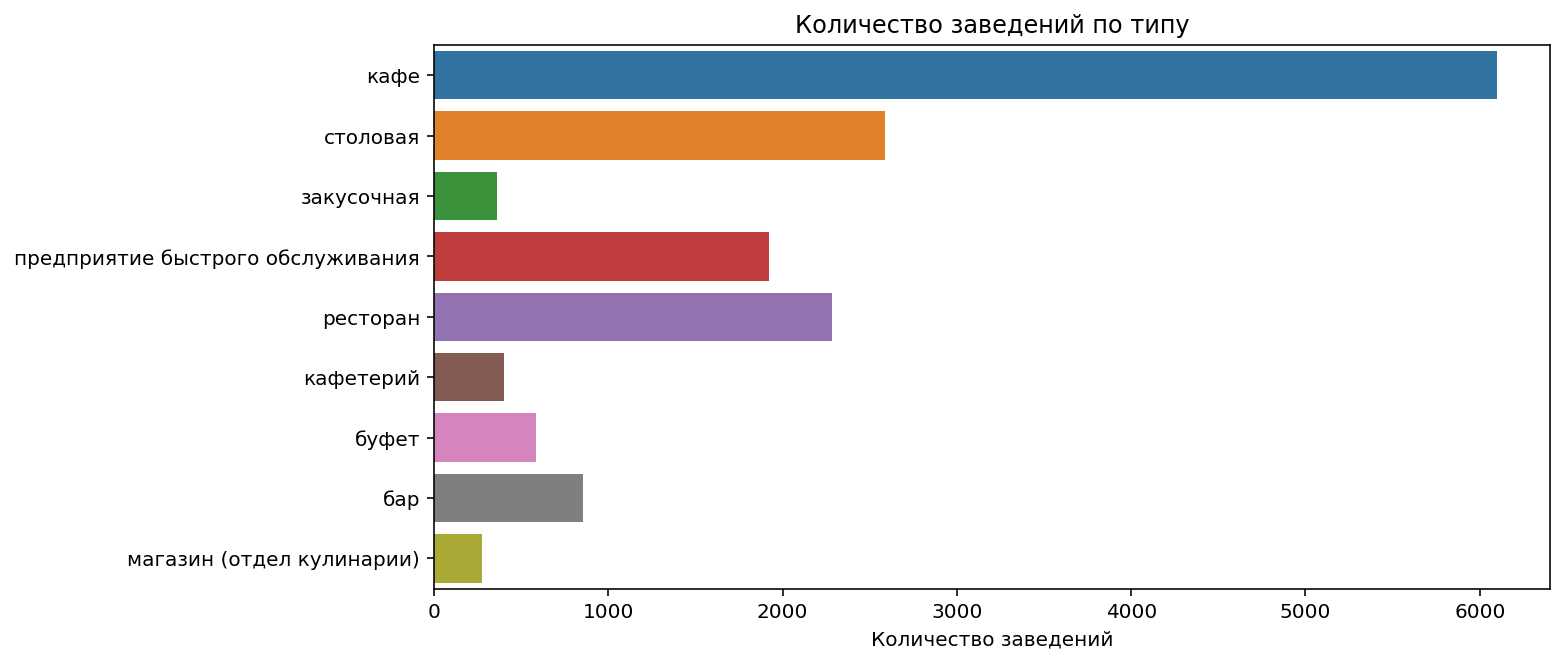

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(y='object_type', data=rest_data)
plt.title('Количество заведений по типу')
plt.ylabel('')
plt.xlabel('Количество заведений')
plt.show()

Также для лучшей информативности посмотрим интерактивную диаграмму.

a = rest_data.pivot_table(index='object_type', values='id', aggfunc='count').reset_index()
a.columns = ['object_type', 'count']
a = a.sort_values(by='count', ascending=False)
fig = px.bar(a, x='object_type', y='count'\
             , title='Количество заведений по типу'\
             , labels={'object_type':'', 'count':'Количество заведений'}\
             , color='count')
fig.show()

По полученным результатам видим, что **самое большое количество заведений относится к типу "кафе", далее идут "столовая", "ресторан", "предриятие быстрого обслуживания". Самое маленькое количество объектов представленно типом "магазин(отдел кулинарии)"**.

# 3. Исследование соотношения сетевых и несетевых заведений по количеству.

Теперь проведем исследование по соотношению сетевых и несетевых заведения общественного питания.

Сгруппируем данные по признаку `chain` и посчитаем количество заведений.

In [21]:
rest_by_chain = rest_data.groupby('chain').agg({'id':'nunique'})
rest_by_chain.columns=['count']
rest_by_chain

,count
chain,
да,2968
нет,12398


Мы видим большое преобладание несетевых заведений.

Продемонстрируем это на графиках. Построим столбчатую даиграмму и круговой график.

C:\Users\Vladimir\anaconda3\envs\praktikum_env_win_new\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



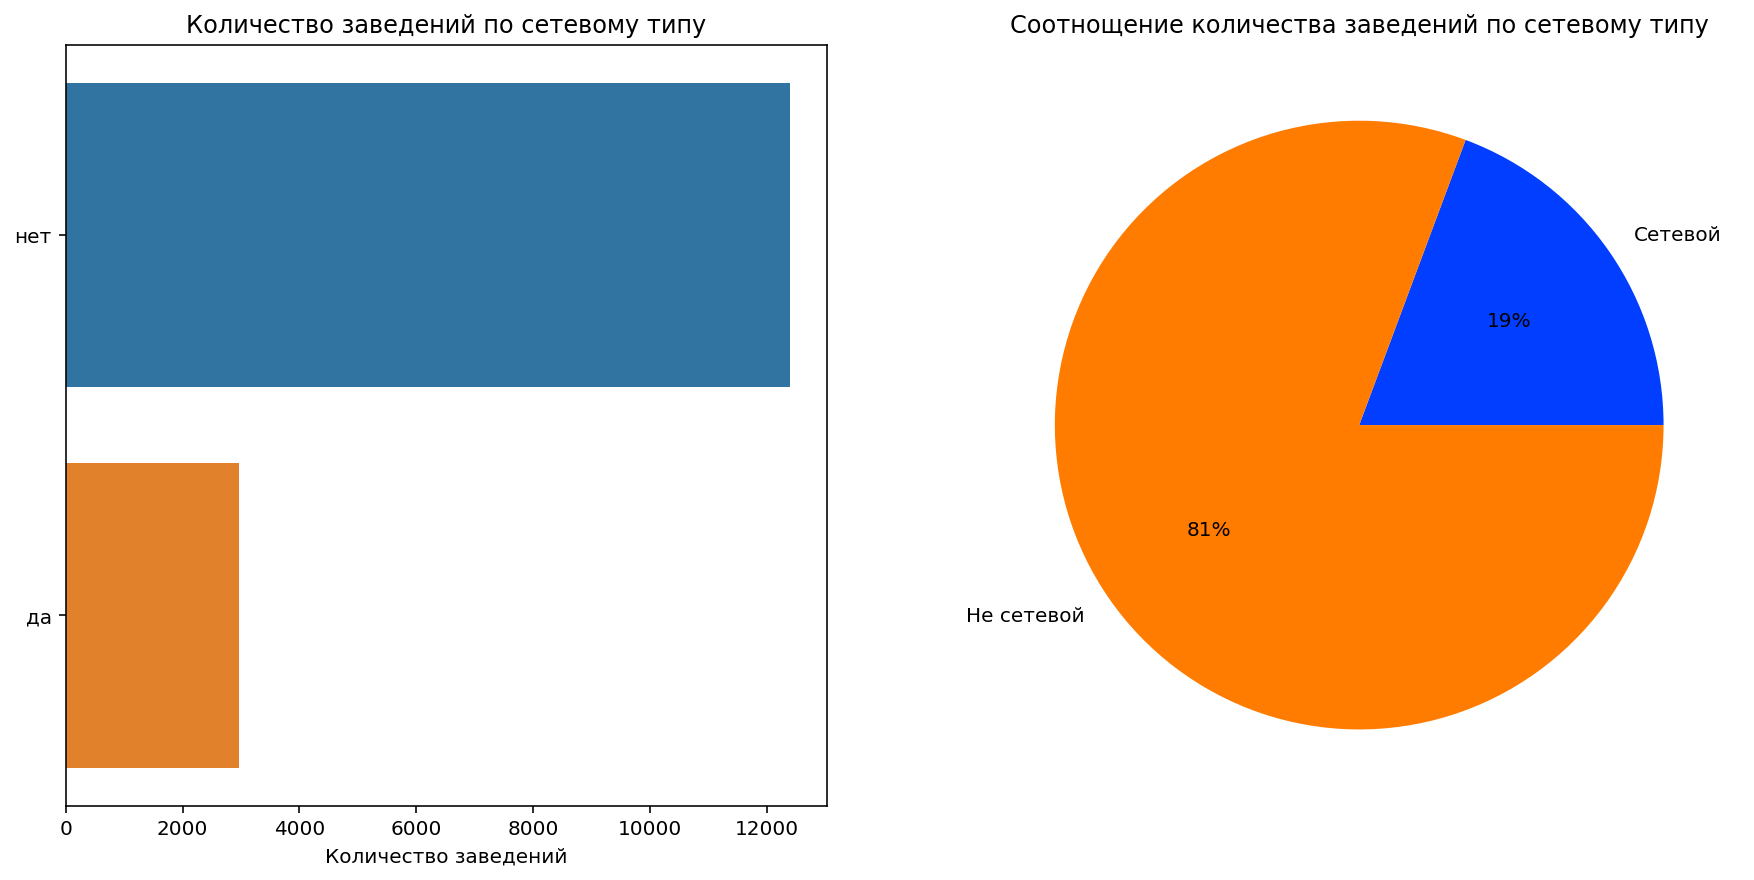

In [22]:
plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 1)
sns.countplot(y='chain', data=rest_data)
plt.title('Количество заведений по сетевому типу')
plt.ylabel('')
plt.xlabel('Количество заведений')
ax2 = plt.subplot(1, 2, 2)
colors = sns.color_palette('bright')[0:5]
labels = ['Сетевой', 'Не сетевой']
plt.pie(rest_by_chain, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Соотнощение количества заведений по сетевому типу')
plt.show()

Наши выводы по результатам: **несетевые объекты общественного питания распространены гораздо больше - в соотношении 1:4**.

Также рассмотри распределение сетевых и несетевых заведеий по виду объекта общественного питания.

Отобразим на графике.

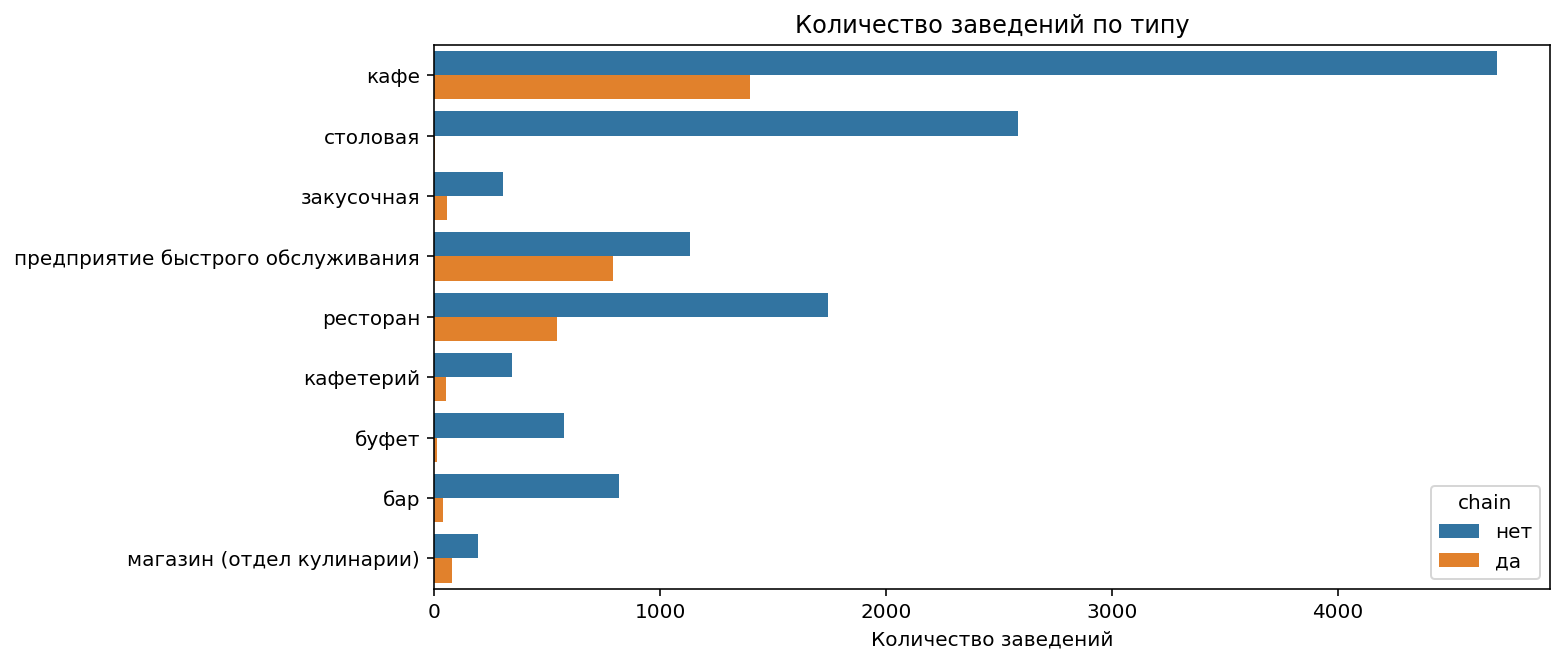

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(y='object_type', data=rest_data, hue='chain')
plt.title('Количество заведений по типу')
plt.ylabel('')
plt.xlabel('Количество заведений')
plt.show()

Также добавим немного  интерактивности.

b = rest_data.pivot_table(index=['object_type', 'chain'], values='id', aggfunc='count').reset_index()
b.columns = ['object_type', 'chain', 'count']
b = b.sort_values(by='count', ascending=False)
fig = px.bar(b, x='object_type', y='count'\
             , title='Количество заведений по типу'\
             , labels={'object_type':'', 'count':'Количество заведений'}\
             , color='chain', height=800)
fig.show()

In [25]:
rest_data.groupby(['object_type', 'chain']).agg({'id':'nunique'})

id
object_type                       chain      
бар                               да       37
                                  нет     819
буфет                             да       11
                                  нет     574
закусочная                        да       56
                                  нет     304
кафе                              да     1396
                                  нет    4703
кафетерий                         да       52
                                  нет     346
магазин (отдел кулинарии)         да       78
                                  нет     195
предприятие быстрого обслуживания да      791
                                  нет    1132
ресторан                          да      544
                                  нет    1741
столовая                          да        3
                                  нет    2584

In [26]:
c = rest_data.pivot_table(index='object_type', values='id', aggfunc='count').reset_index()
c.columns = ['object_type', 'sum']
b = b.merge(c, on='object_type', how='left')
b['%'] = (b['count']/b['sum']*100).round()
b.sort_values(by='object_type')

,object_type,chain,count,sum,%
15,бар,да,37,856,4.0
5,бар,нет,819,856,96.0
7,буфет,нет,574,585,98.0
16,буфет,да,11,585,2.0
10,закусочная,нет,304,360,84.0
13,закусочная,да,56,360,16.0
0,кафе,нет,4703,6099,77.0
3,кафе,да,1396,6099,23.0
14,кафетерий,да,52,398,13.0
9,кафетерий,нет,346,398,87.0


<Figure size 360x1080 with 0 Axes>

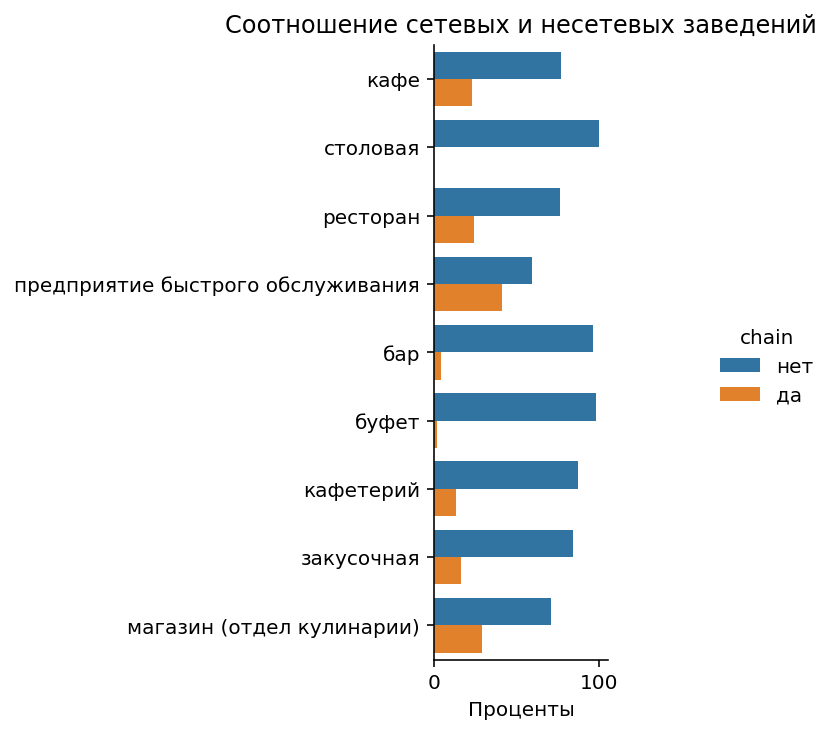

In [27]:
plt.figure(figsize=(5, 15))
sns.catplot(x='%', y='object_type', hue='chain', kind='bar', data=b)
plt.title('Соотношение сетевых и несетевых заведений')
plt.ylabel('')
plt.xlabel('Проценты')
plt.show()

Мы видим по результатам, что **сетевой тип характерен для объектов "кафе", "ресторан", "предприятие общественного питания" и "магазин (отдел кулинарии)"**. 

По соотношению сетевых заведений к несетевым можно выделить **предприятия быстрого обслуживания, отношение которых 2:3, и это самй высокий показатель**. В остальных случаях преобладание несетевых заведений много больше. Также стоит отметить типы заведений **буфет, бар, столовая, в которых более 95% объектов представленны несетевыми заведениями**.

# 4. Исследование характера сетевых заведений по группам.

Проведем исследование сетевых объектов общественного питания по количеству посадочных мест. Мы хотим узнать, что взаимосвязь количетсва завдений для одной сети с количеством посадочных мест для сетевых заведений.

Для этого отфильтруем данные по признаку `chain` и разделим все заведения по четырем группам: 

 - много заведений, много мест;
 
 - много заведений, мало мест;
 
 - мало заведений, много мест;
 
 - мало заведений, мало мест.

In [28]:
rest_chain_y = rest_data.query('chain == "да"')

Выделим в отдельную таблицу сгруппированные данные по количеству завдений и среднему количеству посадочных мест для сетевых объектов.

In [29]:
rest_chain_y = rest_chain_y.pivot_table(index=['object_name'], values='number', aggfunc=['count', 'mean']).reset_index()
rest_chain_y.columns = ['name','number_restaurant','number_place']
rest_chain_y['number_place'] = rest_chain_y['number_place'].apply(round)
rest_chain_y = rest_chain_y.sort_values(by = ['number_restaurant'], ascending= False)
rest_chain_y

,name,number_restaurant,number_place
29,KFC,188,56
506,Шоколадница,185,58
38,McDonalds,173,87
7,Burger King,159,48
465,Теремок,111,27
...,...,...,...
219,Кафе «Кулинарное бюро»,1,18
218,Кафе «Кулинарная лавка братьев Караваевых»,1,10
215,Кафе «Ваби-Саби»,1,98
210,Кальянная F-lounge,1,30


In [30]:
rest_chain_y['number_restaurant'].mean()

5.72972972972973

In [31]:
rest_chain_y['number_place'].median()

48.0

Медианное значение количетсва посадочных мест 48. Возьмем за точку отсечения между группами 50 посадочныъ мест.
А границу разделения между крупными и некрупными сетевыми хаведениями возьмем количество заведений 5.


Зададим функцию, которая обработает и разделит данные по группам.

In [32]:
def category(row):
    num_rest = row['number_restaurant']
    num_place = row['number_place']
    if num_rest <= 5 and num_place <= 50:
        return 'Мало заведений - мало мест'
 
    elif num_rest > 5 and num_place <= 50:
        return 'Много заведений - мало мест'  
 
    elif num_rest <= 5 and num_place > 50:
        return 'Мало заведений - много мест'
 
    return 'Много заведений - много мест'

Применим к созданому датафрйему и создадим отдельный столбец `category`

In [33]:
rest_chain_y['category'] = rest_chain_y.apply(category, axis=1)
rest_chain_y.head()

,name,number_restaurant,number_place,category
29,KFC,188,56,Много заведений - много мест
506,Шоколадница,185,58,Много заведений - много мест
38,McDonalds,173,87,Много заведений - много мест
7,Burger King,159,48,Много заведений - мало мест
465,Теремок,111,27,Много заведений - мало мест


Теперь отобразим на диаграмме распределение объектов общественного питания с группировкой.

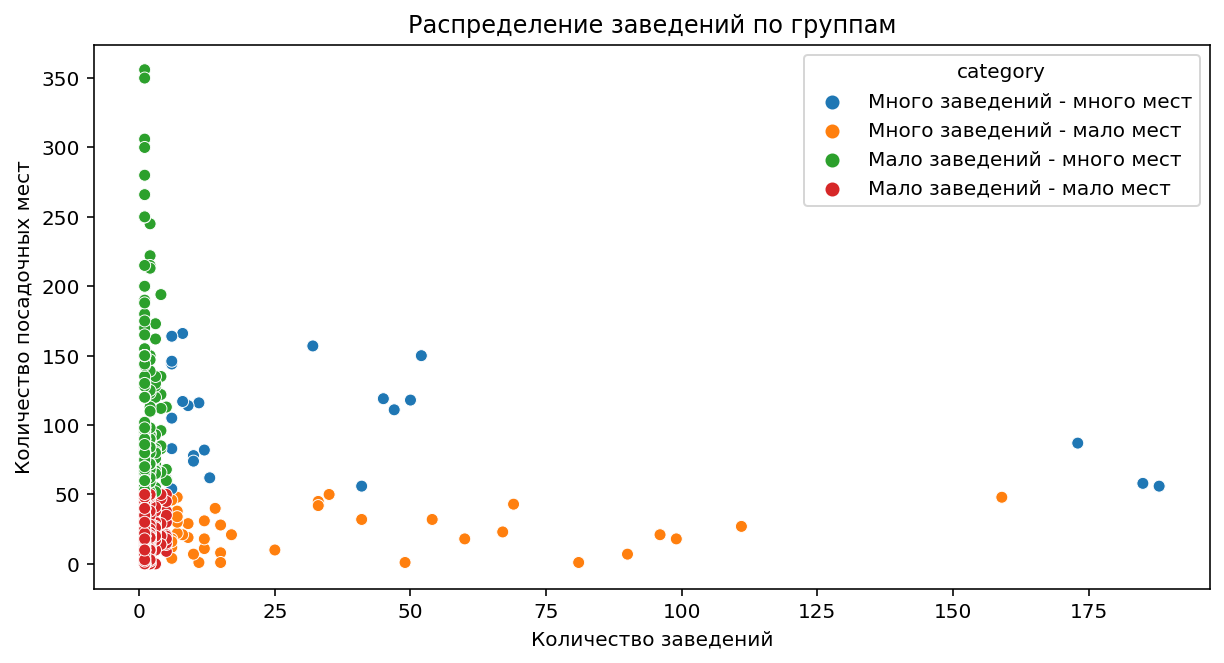

In [34]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='number_restaurant', y='number_place', data=rest_chain_y, hue='category')
plt.title('Распределение заведений по группам')
plt.ylabel('Количество посадочных мест')
plt.xlabel('Количество заведений')
plt.show()

Также добавим  интереактивный график.

fig = px.scatter(rest_chain_y, x='number_restaurant', y='number_place'\
                 , color='category', title='Распределение завдений по группам'\
                 , labels={'number_restaurant':'Количество заведений', 'number_place':'Количество посадочных мест'})
fig.show()

На графике мы видим, что **чем крупнее сеть, тем реже становиться распределение. Также можно добавить, что количество посадочных мест по крупным сетям распределено неравномерно, с большим разбросом. Но можно заключить, что крупные сети более предпочитают небольшое количество посадочных мест.**

**Некрупные сети имеют более компактное распределение, но также имеют большие выбросы по количеству посадочных мест. Это может быть обусловленно погрешностью принятой нами при обработке синонимов названий заведений( некоторые сетевые заведения представленны в количестве одна единица).**

In [36]:
rest_data_y = rest_data.query('chain == "да"').rename(columns={'object_name':'name'})
rest_data_y = rest_data_y.merge(rest_chain_y, on='name', how='left')

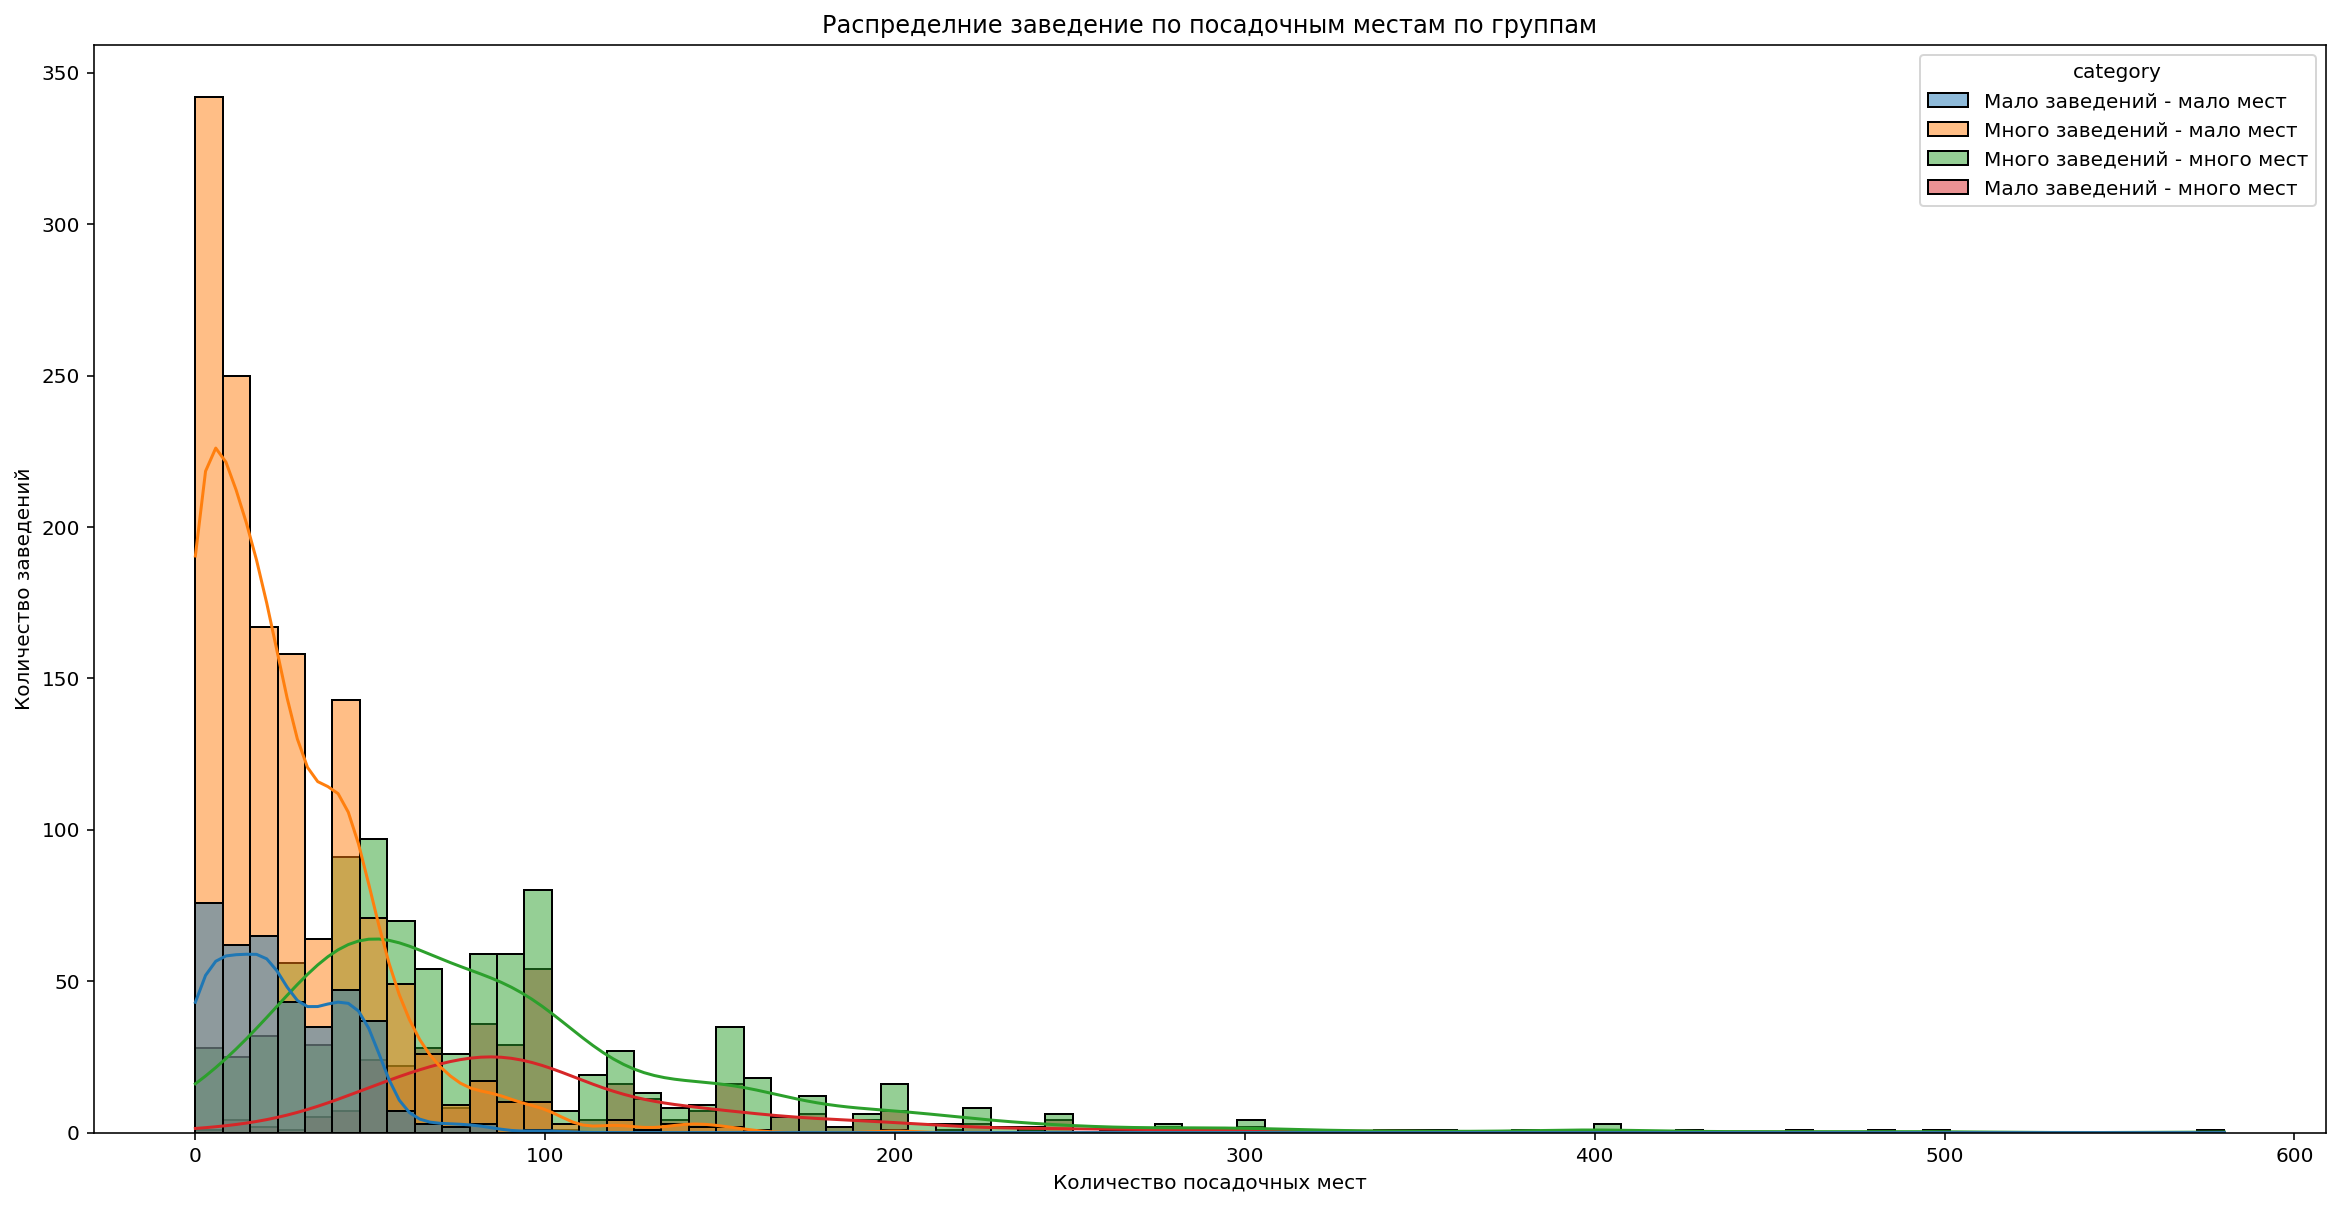

In [37]:
plt.figure(figsize=(20, 10))
sns.histplot(rest_data_y, x='number', hue='category', kde=True)
plt.title('Распределние заведение по посадочным местам по группам')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.show()

# 5. Исследование видов объектов общественного питания по среднему количеству посадочных мест.

Теперь посмотрим на распределение завдений по количеству посадочных мест по сетевому признаку.

Для этого сгруппируем данные типу объекта и сетевому признаку и посчитаме медианное количество посадочных мест.

In [38]:
rest_by_type = rest_data.pivot_table(index=['object_type', 'chain'], values='number', aggfunc='median').reset_index()
rest_by_type['number'] = rest_by_type['number'].round()
rest_by_type = rest_by_type.sort_values(by='number', ascending=False)

Отобразим результаты на графике.

<Figure size 360x1080 with 0 Axes>

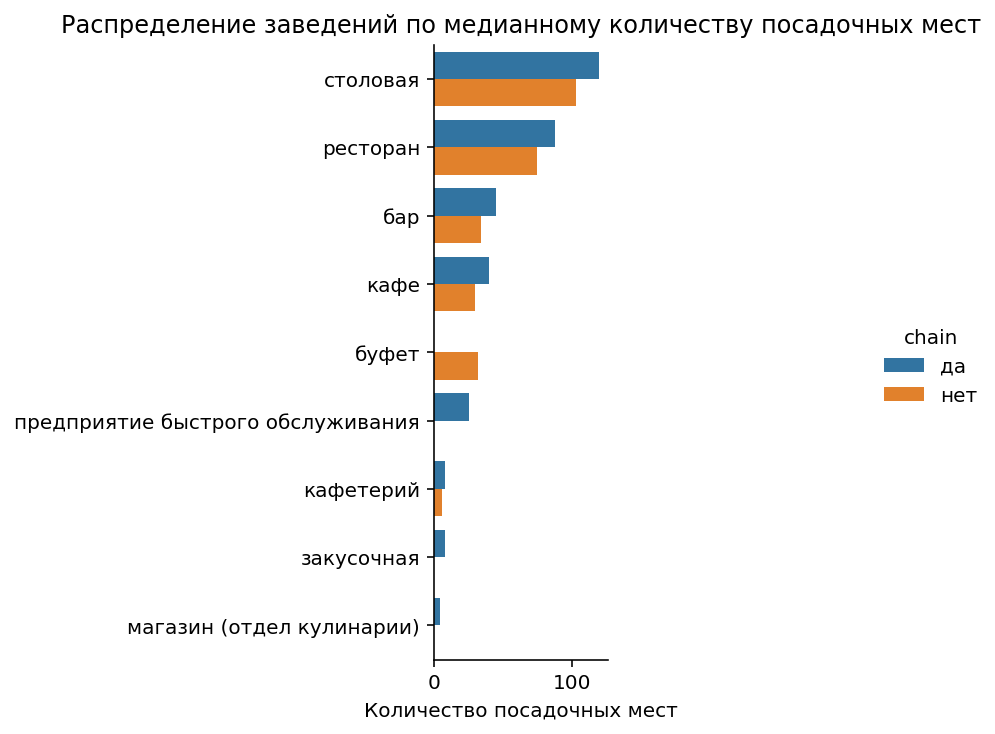

In [39]:
plt.figure(figsize=(5, 15))
sns.catplot(x='number', y='object_type', hue='chain', kind='bar', data=rest_by_type)
plt.title('Распределение заведений по медианному количеству посадочных мест')
plt.ylabel('')
plt.xlabel('Количество посадочных мест')
plt.show()

Также отобразим результаты на интреактивном графике.

fig = px.bar(rest_by_type, x='object_type', y='number', color='chain'\
            , labels={'object_type':'', 'number':'Количество посадочных мест'}\
            , title='Распределение заведений по медианному количеству посадочных мест')
fig.show()

Мы видим, что **наибольшее количество посадочных мест имеют "столовая" и "ресторан"**. А **меньше всего посадочных мест в заведениях "кафетерий", "закусочная", "магазин (отдел кулинарии)".**

Теперь отобразим те же условия, но для среднего количества посадочных мест.

In [41]:
report = rest_data.pivot_table(index=['object_type', 'chain'], values='number', aggfunc='mean').reset_index()
report['number'] = report['number'].round()
report = report.sort_values(by='number', ascending=False)

Построим столбчатую диаграмму.

<Figure size 360x1080 with 0 Axes>

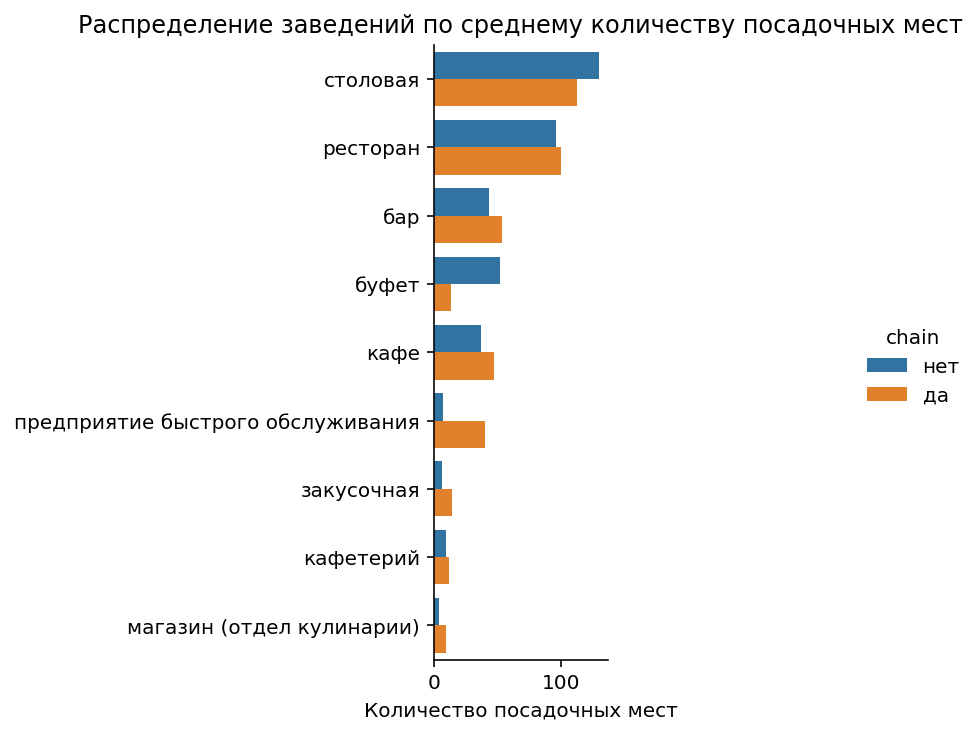

In [42]:
plt.figure(figsize=(5, 15))
sns.catplot(x='number', y='object_type', hue='chain', kind='bar', data=report)
plt.title('Распределение заведений по среднему количеству посадочных мест')
plt.ylabel('')
plt.xlabel('Количество посадочных мест')
plt.show()

Добавим интерактивности.

fig = px.bar(report, x='object_type', y='number', color='chain'\
            , labels={'object_type':'', 'number':'Количество посадочных мест'}\
            , title='Распределение заведений по среднему количеству посадочных мест')
fig.show()

Мы видим практически идентичные результаты, поэтому окончательно заключаем,что **наибольшее количество посадочных мест имеют "столовая" и "ресторан"**. А **меньше всего посадочных мест в заведениях "кафетерий", "закусочная", "магазин (отдел кулинарии)".**

# 6. Исследование расположения объектов общественного питания по улицам.

Теперь нам необходимо узнать распределение объектов общественного питания по улицам и районам Москвы. 

Для этого надо выделить в отедльный столбец названия улиц из соответствующего столбца изначального датафрейма.

Также нам надо будет добавить внешние данные с привязкой улиц к районам Москвы.

Приступим.

In [44]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Выделим в столбец `streetname` название улиц.

In [45]:
rest_data['streetname']= rest_data['address'].str.extract(r'(?:,\s+)(.+?)(?:,)')

Импортируем внешние данные для привязки улиц по районам.

In [46]:
from io import BytesIO
import requests
spreadsheet_id = '1RRftvrOHQTiYJI_VsSzDntsCo6s4xvEEljzrrv2yrGc'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


# 7. Топ-10 улиц по количеству объектов общественного питания.

Теперь посмотрим на топ-10 улиц по количеству объектов общественного питания.

Для этого сгруппируем данные по улицам и посчитаем количество заведений, удалим из списка город Зеленоград и пос. Сосенское. Далее присоединим к данным таблицу с районами Москвы и выведем на экран.

In [47]:
top_ten_streets = rest_data.groupby('streetname', as_index=False)['id']\
                           .count().sort_values(by='id', ascending=False)\
                           .query('streetname != "город Зеленоград" & streetname != "поселение Сосенское"')\
                           .head(10)
top_ten_streets = top_ten_streets.merge(df, on='streetname', how='left')
top_ten_streets

,streetname,id,areaid,okrug,area
0,проспект Мира,204,70,СВАО,Алексеевский район
1,проспект Мира,204,86,СВАО,Ярославский Район
2,проспект Мира,204,78,СВАО,Район Марьина роща
3,проспект Мира,204,79,СВАО,Останкинский район
4,проспект Мира,204,81,СВАО,Район Ростокино
5,проспект Мира,204,82,СВАО,Район Свиблово
6,проспект Мира,204,16,ЦАО,Мещанский район
7,Профсоюзная улица,182,123,ЮЗАО,Академический район
8,Профсоюзная улица,182,132,ЮЗАО,Район Черемушки
9,Профсоюзная улица,182,134,ЮЗАО,Район Ясенево


Отдельно вывдем на экран уникальные названия районов, где располагаются топ-10 улиц.

In [48]:
top_ten_streets['area'].unique()

array(['Алексеевский район', 'Ярославский Район', 'Район Марьина роща',
       'Останкинский район', 'Район Ростокино', 'Район Свиблово',
       'Мещанский район', 'Академический район', 'Район Черемушки',
       'Район Ясенево', 'Район Коньково', 'Обручевский район',
       'Район Теплый Стан', 'Район Аэропорт', 'Район Беговой',
       'Хорошевский район', 'Район Сокол', 'Пресненский район',
       'Район Чертаново Центральное', 'Район Чертаново Северное',
       'Район Чертаново Южное', 'Донской район',
       'Район Нагатино-Садовники', 'Нагорный район',
       'Район Северное Бутово', 'Район Южное Бутово',
       'Район Проспект Вернадского', 'Район Тропарево-Никулино',
       'Район Гагаринский', 'Ломоносовский район', 'Район Якиманка',
       'Район Раменки', 'Район Дорогомилово', 'Район Фили-Давыдково',
       'Район Москворечье-Сабурово', 'Район Орехово-Борисово Южное',
       'Район Орехово-Борисово Северное'], dtype=object)

Построим столбчатую диаграмму по количетсву заведений по улицам.

<Figure size 720x360 with 0 Axes>

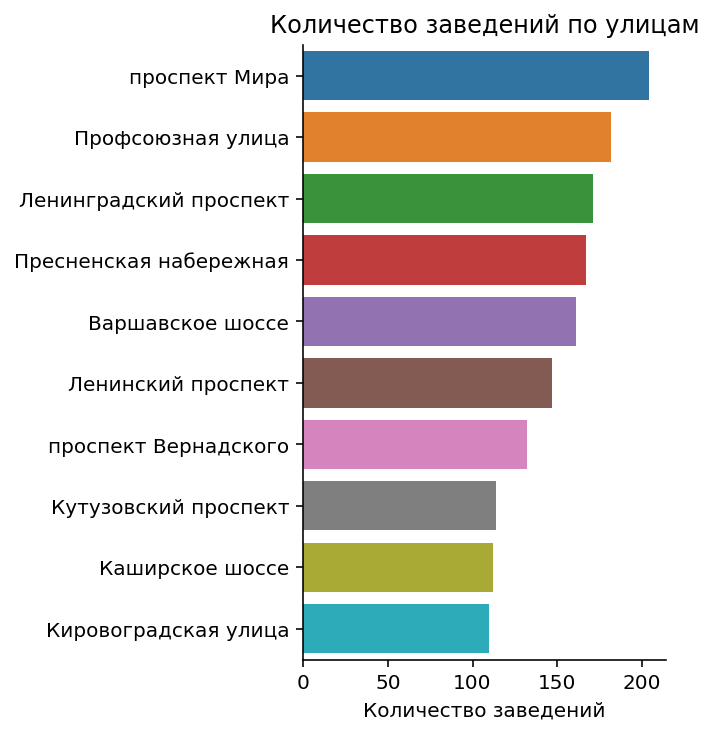

In [49]:
plt.figure(figsize=(10, 5))
sns.catplot(x='id', y='streetname', kind='bar', data=top_ten_streets)
plt.title('Количество заведений по улицам')
plt.ylabel('')
plt.xlabel('Количество заведений')
plt.show()

Самые популярные улицы для размещения объектов общественного питания - **проспект Мира, Профсоюзная ул., Ленинградский проспект, Пресненская набережная.** Если обобщать, то это крупные улицы либо улицы, которые располагаются близко к центру Москвы.

Если разделить по районам, то это раойны относящиеся к северу, западу и югу Москвы. 

(Однако стоит заметить, что так как наше исследование не предполагает анализа местоположения и удаленности от центра заведений, мы не можем проанализировать многочисленные заведения в центре, располагающиеся на многих небольших улицах.)

Также проанализируем распределение заведений по количеству посадочных мест по топ-10 улиц.

In [50]:
top_ten_streets_list = top_ten_streets['streetname'].unique()
data = rest_data.query('streetname in @top_ten_streets_list')

Построим диаграмму распределения.

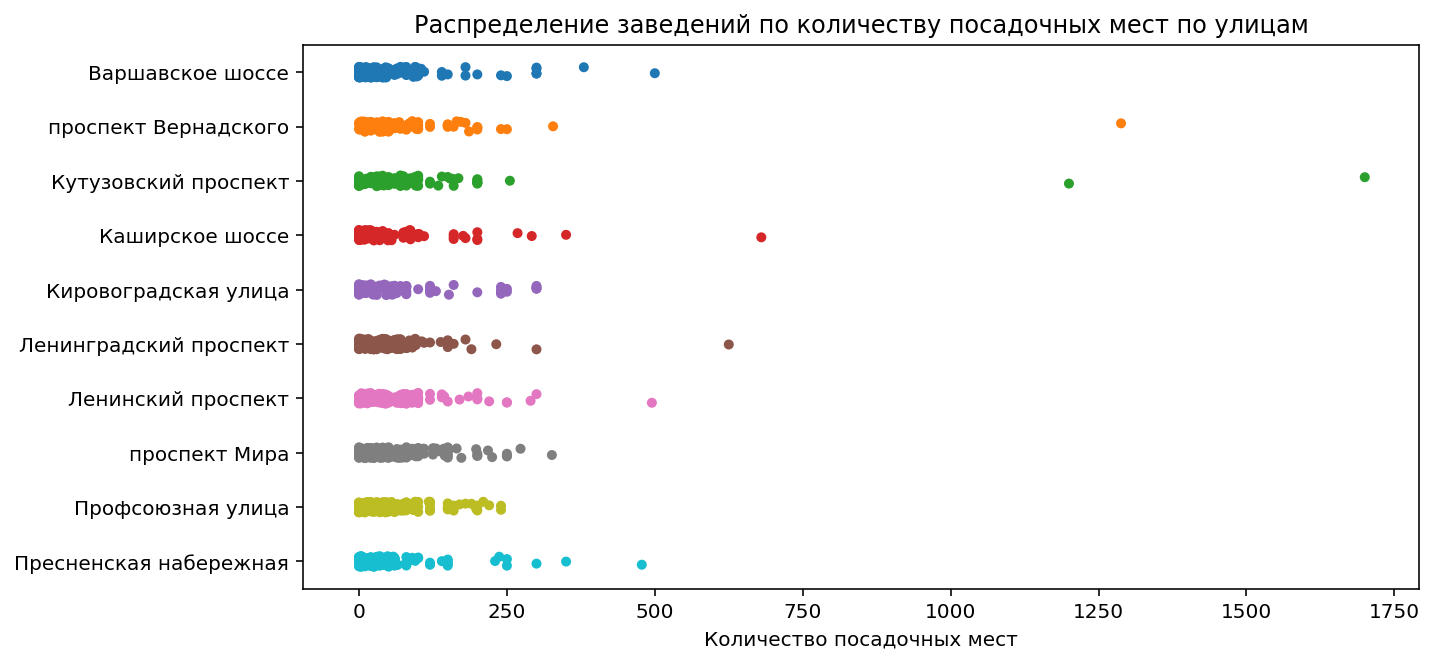

In [51]:
plt.figure(figsize=(10, 5))
ax = sns.stripplot(x='number', y='streetname', data=data)
plt.title('Распределение заведений по количеству посадочных мест по улицам')
plt.ylabel('')
plt.xlabel('Количество посадочных мест')
plt.show()

А также интерактивный график.

fig = px.scatter(data, x='number', y='streetname', color='streetname'\
                , labels={'number':'Количетво', 'streetname':''}\
                , title='Распределение заведений по количеству посадочных мест по улицам')
fig.show()

На диаграмме мы видим очень большие выбросы - это крупные заведения предприятий либо арены и концерт_холлы.

Вывод: **основная часть объектов распределены на топ-10 улицах в пределах до 100 посадочных мест**. 

In [53]:
data.sort_values(by='number', ascending=False).head(10)

,id,object_name,chain,object_type,address,number,streetname
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, строение 11",1700,Кутузовский проспект
9064,19719,КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»,нет,столовая,"город Москва, проспект Вернадского, дом 84, строение 1",1288,проспект Вернадского
4480,27024,РУМ СЕРВИС,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, строение 1",1200,Кутузовский проспект
4110,29320,Столовая,нет,столовая,"город Москва, Каширское шоссе, дом 31",680,Каширское шоссе
7104,27033,Банкетный,нет,ресторан,"город Москва, Ленинградский проспект, дом 31А, строение 1",625,Ленинградский проспект
7603,28149,САПФИР 1,нет,столовая,"город Москва, Варшавское шоссе, дом 127",500,Варшавское шоссе
6441,22856,Ресторан «ЦДТ»,нет,ресторан,"город Москва, Ленинский проспект, дом 146",495,Ленинский проспект
9327,167290,Ресторан Фреш Сити,нет,ресторан,"город Москва, Пресненская набережная, дом 8, строение 1",478,Пресненская набережная
1622,23815,Огни Баку,нет,ресторан,"город Москва, Варшавское шоссе, дом 152, корпус 2",380,Варшавское шоссе
8469,93810,Иль Патио,да,ресторан,"город Москва, Пресненская набережная, дом 2",350,Пресненская набережная


# 8. Улицы с одним объектом общественного питания.

Также нам необходимо найти улицы на которых располагется всего один объект общественного питания.

Для этого сгруппируем данные по улицам и отфильтруем по количеству заведений.

In [54]:
one_rest_streets = rest_data.groupby('streetname', as_index=False)['id']\
                           .count().query('id == 1')
print('Количество улиц с одним объектом питания:', len(one_rest_streets))

Количество улиц с одним объектом питания: 571


В Москве есть 571 улица с всего одним объектом общественного питания.

In [55]:
one_rest_streets

,streetname,id
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1
7,1-й Вешняковский проезд,1
9,1-й Голутвинский переулок,1
...,...,...
1873,улица Шеногина,1
1876,улица Шумилова,1
1877,улица Шумкина,1
1881,улица Щорса,1


Посмотрим на районы где располаются эти улицы.

In [56]:
one_rest_streets = one_rest_streets.merge(df, on='streetname', how='left')
one_rest_streets.groupby('area').agg({'streetname':'count'}).sort_values(by='streetname', ascending=False)

,streetname
area,
Таганский район,27
Район Хамовники,26
Басманный район,25
Тверской район,20
Пресненский район,19
...,...
Район Марьино,1
Район Матушкино-Савелки,1
Район Метрогородок,1


Больше всего улиц с единственным объектом общественного питания находится в раойнах Даниловский, Мещанский, Донской, Марьина Роща, Якиманка. Это связано с тем, что в этих районах много различных улиц и переулков.

In [57]:
one_rest_streets['area'].isna().sum()

54

In [58]:
one_rest_streets[one_rest_streets.isnull().any(1)]

,streetname,id,areaid,okrug,area
39,104-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
80,26-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
94,3-я Подрезковская улица,1,NaN,NaN,NaN
97,30-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
98,31-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
99,34-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
100,38-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
107,42-й километр Калужского шоссе,1,NaN,NaN,NaN
108,42-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
114,56-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN


Как мы видим при объединении появились улицы без района. В большинстве случаев это были либо отдельные дома без наименования улицы (образовались на этапе выделения улиц из датафрейма), либо МКАД, лиюо поселения в черте города. 

В любом случае их чуть более 10%, что много, но этим можно принебречь. (ранее в проекте мы не заменяли синонимы для всех заведений).

# 9. Вывод. 

По итогам исследования можем заключить следующее:

- самые популярные типы объектов общественного питания - кафе и ресторан;

- заведений, относящихся к несетевым в 4 раза больше, чем относящихся к сетевым;

- среди сетевых заведения также наиболее популярным являются типы "кафе" и "ресторан";

- среди сетевых заведений можно выделить большое количество некрупных сетей с небольшим количеством посадочных мест;

- самое большое количество посадочных мест имеют объекты "столовая" и "ресторан".

- улицы с самым большим количеством объектов питания это крпунейшие улицы Москвы, расположенные на севере, западе, юге города - это пр. Мира, Профсоюзная ул., Лененградский пр., Ленинский пр., Пресненская наб. и др.;

- также стоит особо отметить большое количество улиц с одним объектом общественного питания и расположение таких улиц в центральных раойнах Москвы.

Вывод: **преимущественным типом является "кафе" с количеством посадочных мест 40-50 чел. Предпочтительным районом расположения может быть центральная часть Москвы в границах Третьего транспортного кольца и район Ленинского пр. и пр. Вернадского, где находится большое количество унивеситетов (студенты традиционно являются адептами новых технологий).**

(Сравнение стоимости и конкурентности раойнов необходимо сделать отдельным исследованием)

Наш проект предусматривает дальнейшее расширение до сетевого типа, так как применяемые технологии позволяют в дальнейшем выходить на большую масштабируемость и соответствующее уменьшение себестоимости. Однако это зависит от показателей успешности стартового проекта и коньюнктуры на рынке.